<a href="https://colab.research.google.com/github/avivbach/ML_FirstAssignment/blob/main/team_rocket_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
#Competition link
competition_url = "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques"
print(f"Kaggle Competition: {competition_url}")


Kaggle Competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques


# House Prices Prediction - Advanced Regression Techniques

Dolfin Varshev - 315853101
A link to my kaggle profile: https://www.kaggle.com/dolfinvarshev

Aviv Bachana- 211335286
A link to my kaggle profile:

## Overview

In this notebook, we aim to predict house prices in Ames, Iowa, using the "House Prices - Advanced Regression Techniques" dataset provided by Kaggle. Our primary goal is to build a reliable and accurate predictive model utilizing Linear Regression techniques. To achieve this, we will:


The competition is about developing a model that can predict the sales price.
The goal is to get the model as accurate as we can.
We are going to use Linear Regresssion and SGD for the models.
The loss functions that we will use are R^2 (becuase it is easy to see values between 1-0) and RMSE.
For data handeling we will normlize with StandardScaler and for the strings we will use OneHotEncoder.
For visualization and data handeling we will use matplotlib, seaborn, numpy and pandas.

Throughout this notebook, visualizations and detailed explanations will be provided to clearly communicate our methodology, findings, and insights gained from the analysis. Our final goal is not only achieving a strong predictive performance but also ensuring clarity and reproducibility of the entire analytical process.

## Imports and Definitions

In [95]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))





# Define my custom color palette
my_palette = [
 # Blues
    (0.5, 0.7, 0.9),  # Pastel blue
    (0.6, 0.8, 0.9),  # Light pastel blue
    (0.4, 0.6, 0.8),  # Deep pastel blue
    (0.7, 0.85, 0.95),  # Sky pastel blue
    (0.3, 0.5, 0.7),   # Cool pastel blue
    (0.55, 0.75, 0.85),  # Cloudy pastel blue
    (0.45, 0.65, 0.85),  # Ocean pastel blue
    (0.38, 0.58, 0.78),  # Subtle pastel blue
    (0.48, 0.68, 0.88),  # Misty pastel blue
    (0.6, 0.78, 0.92),  # Calm pastel blue
    (0.5, 0.73, 0.85) , # Soft sky pastel blue


#Purples =
    (0.8, 0.6, 0.9),  # Pastel purple
    (0.7, 0.5, 0.8),  # Light pastel purple
    (0.9, 0.7, 1.0),  # Soft lavender
    (0.85, 0.65, 0.95),  # Subtle pastel purple
    (0.75, 0.55, 0.85),  # Dreamy pastel purple
    (0.92, 0.72, 0.98),  # Lilac pastel purple
    (0.78, 0.58, 0.88),  # Light orchid purple
    (0.82, 0.62, 0.92),  # Lavender blush pastel purple
    (0.88, 0.68, 0.96),  # Light violet pastel purple
    (0.83, 0.63, 0.9),  # Soft amethyst pastel purple
    (0.9, 0.75, 0.97),   # Blooming pastel purple

#Pinks
    (224/255, 31/255, 137/255),  # Vibrant pink
    (231/255, 72/255, 161/255),  # Medium pink
    (243/255, 165/255, 208/255),  # Light pink
    (1.0, 0.8, 0.9),  # Cotton candy pink
    (0.95, 0.7, 0.85),  # Blush pink
    (0.98, 0.75, 0.88),  # Rose quartz pastel pink
    (0.96, 0.68, 0.8),  # Soft coral pastel pink
    (0.94, 0.6, 0.75),  # Pastel bubblegum pink
    (0.97, 0.77, 0.87),  # Sakura pastel pink
    (0.92, 0.65, 0.8),  # Light raspberry pastel pink
    (0.89, 0.58, 0.72),   # Dusky pastel pink

    # haneul
    (0.482, 0.427, 0.553),
    (0.663, 0.608, 0.737),
    (0.89, 0.843, 0.949),
    (0.322, 0.271, 0.427),
    (0.62, 0.533, 0.78),

    # HaneulPink
    (0.988, 0.831, 0.761),
    (1.0, 0.808, 0.749),
    (0.98, 0.874, 0.843),
    (0.988, 0.718, 0.718),
    (0.961, 0.804, 0.835),

    # inspo #5
    (0.451, 0.549, 0.408),
    (0.561, 0.671, 0.514),
    (0.667, 0.82, 0.6),
    (0.788, 0.953, 0.718),
    (0.898, 1.0, 0.851)
]


# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["image.cmap"] = "PuBu"
sns.set(style="whitegrid", palette=my_palette)

pd.set_option('display.max_columns', None)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading the data from the files**

In [96]:
# Load the train and test datasets
# Load the train and test datasets
test_path ='test.csv'
train_path = 'train.csv'


train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 📘 Data Dictionary

| Feature       | Description              | Values (examples)                               |
|:--------------|:-------------------------|:------------------------------------------------|
| MSSubClass    | Dwelling type            | 20:1-story newer, 30:older, 60:2-story, 120:PUD |
| MSZoning      | Zoning class             | RL, RM, C, FV, I                                |
| LotFrontage   | Street frontage          | Numeric (ft)                                    |
| LotArea       | Lot size                 | Numeric (sq ft)                                 |
| Street        | Road access              | Pave, Grvl                                      |
| Alley         | Alley access             | Pave, Grvl, NA                                  |
| LotShape      | Shape of lot             | Reg, IR1, IR2, IR3                              |
| LandContour   | Flatness                 | Lvl, Bnk, HLS, Low                              |
| Utilities     | Available utilities      | AllPub, NoSeWa, ELO                             |
| LotConfig     | Lot configuration        | Inside, Corner, CulDSac, FR2, FR3               |
| LandSlope     | Slope of lot             | Gtl, Mod, Sev                                   |
| Neighborhood  | Physical location        | OldTown, CollgCr, StoneBr, etc.                 |
| Condition1    | Proximity to features    | Norm, Artery, Feedr, RRAn, PosN                 |
| BldgType      | Type of dwelling         | 1Fam, Duplx, TwnhsE, etc.                       |
| HouseStyle    | Dwelling style           | 1Story, 2Story, SFoyer, SLvl                    |
| OverallQual   | Overall material quality | 1–10                                            |
| OverallCond   | Overall condition        | 1–10                                            |
| YearBuilt     | Year built               | Numeric (year)                                  |
| YearRemodAdd  | Remodel year             | Numeric (year)                                  |
| RoofStyle     | Roof type                | Gable, Hip, Flat, etc.                          |
| RoofMatl      | Roof material            | CompShg, Metal, WdShngl, etc.                   |
| Exterior1st   | Primary exterior         | VinylSd, HdBoard, BrkFace, etc.                 |
| Exterior2nd   | Secondary exterior       | Same as Exterior1st                             |
| MasVnrType    | Masonry veneer type      | BrkFace, Stone, None                            |
| MasVnrArea    | Masonry area             | Numeric (sq ft)                                 |
| ExterQual     | Exterior quality         | Ex, Gd, TA, Fa, Po                              |
| ExterCond     | Exterior condition       | Ex, Gd, TA, Fa, Po                              |
| Foundation    | Foundation type          | PConc, CBlock, Slab, etc.                       |
| BsmtQual      | Basement height          | Ex, Gd, TA, Fa, Po, NA                          |
| BsmtFinSF1    | Finished basement SF     | Numeric                                         |
| Heating       | Heating type             | GasA, GasW, Grav, etc.                          |
| CentralAir    | Central air              | Y, N                                            |
| GrLivArea     | Above-ground living area | Numeric (sq ft)                                 |
| FullBath      | Full baths above grade   | Numeric                                         |
| KitchenQual   | Kitchen quality          | Ex, Gd, TA, Fa, Po                              |
| GarageType    | Garage location          | Attchd, Detchd, BuiltIn, etc.                   |
| GarageCars    | Garage capacity          | Numeric (cars)                                  |
| GarageArea    | Garage area              | Numeric (sq ft)                                 |
| PavedDrive    | Driveway paved           | Y, P, N                                         |
| SaleType      | Type of sale             | WD, New, COD, Con, etc.                         |
| SaleCondition | Sale condition           | Normal, Abnorml, Family, etc.                   |


# **Processing the data**

#### Visualize columns with missing values
This is another method to examine columns with missing values — using a more visual approach.  
It provides a combined table showing:
- The number of missing values per feature
- The percentage they represent out of the total dataset
- A barplot that highlights the columns that require attention

This visualization makes it easier to identify problematic features and decide on appropriate handling strategies.


,Column,Null_Count_train,Null_Count_test,%_train,%_test
0,PoolQC,1453,1456,99.520548,99.794380
1,MiscFeature,1406,1408,96.301370,96.504455
2,Alley,1369,1352,93.767123,92.666210
3,Fence,1179,1169,80.753425,80.123372
4,MasVnrType,872,894,59.726027,61.274846
5,FireplaceQu,690,730,47.260274,50.034270
6,LotFrontage,259,227,17.739726,15.558602
7,GarageFinish,81,78,5.547945,5.346127
8,GarageCond,81,78,5.547945,5.346127
9,GarageYrBlt,81,78,5.547945,5.346127


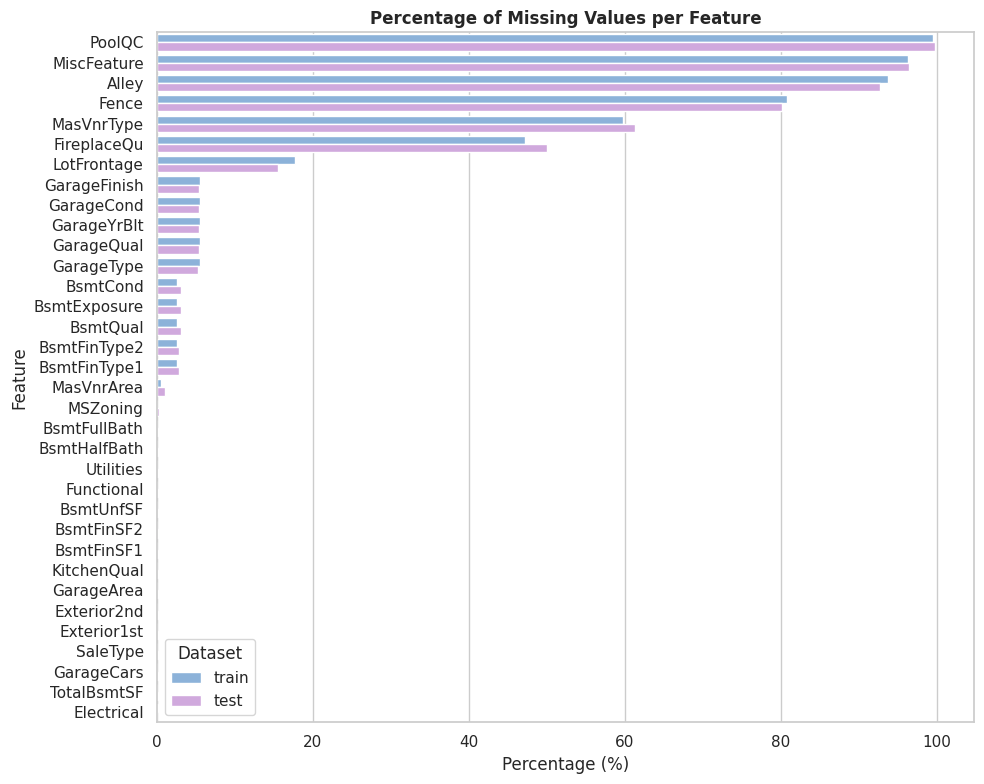

In [98]:

def analyze_missing_values(train_df, test_df, palette=None):
    """
    Displays and plots missing value statistics (counts and percentages)
    for training and testing datasets.

    Parameters:
    - train_df: pandas DataFrame for training data
    - test_df: pandas DataFrame for testing data
    - palette: optional color palette for barplots (list of 2 colors)
    """
    # Use default palette if none provided
    if palette is None:
        palette = sns.color_palette("Set2")[:2]

    # Step 1: Count missing values
    train_nulls = train_df.isnull().sum()
    test_nulls = test_df.isnull().sum()

    # Step 2: Create DataFrames with missing columns only
    train_nulls_df = train_nulls[train_nulls > 0].reset_index()
    train_nulls_df.columns = ['Column', 'Null_Count_train']

    test_nulls_df = test_nulls[test_nulls > 0].reset_index()
    test_nulls_df.columns = ['Column', 'Null_Count_test']

    # Step 3: Merge train and test missing info
    combined_nulls_df = pd.merge(train_nulls_df, test_nulls_df, on='Column', how='outer').fillna(0)
    combined_nulls_df[['Null_Count_train', 'Null_Count_test']] = combined_nulls_df[['Null_Count_train', 'Null_Count_test']].astype(int)

    # Step 4: Add % columns
    combined_nulls_df['%_train'] = combined_nulls_df['Null_Count_train'] / len(train_df) * 100
    combined_nulls_df['%_test'] = combined_nulls_df['Null_Count_test'] / len(test_df) * 100

    # Step 5: Sort by test % (can change to train or total)
    combined_nulls_df = combined_nulls_df.sort_values(by='%_test', ascending=False).reset_index(drop=True)

    # Step 6: Display the final summary table
    display(combined_nulls_df)


    # Step 8: Barplot — Missing Value Percentages
    df_percent = combined_nulls_df.melt(
        id_vars='Column',
        value_vars=['%_train', '%_test'],
        var_name='Dataset',
        value_name='Missing Percentage'
    )
    df_percent['Dataset'] = df_percent['Dataset'].str.replace('%_', '')

    plt.figure(figsize=(10, 8))
    sns.barplot(data=df_percent, y='Column', x='Missing Percentage', hue='Dataset', palette=palette)
    plt.title('Percentage of Missing Values per Feature')
    plt.xlabel('Percentage (%)')
    plt.ylabel('Feature')
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

analyze_missing_values(train_data, test_data, palette=[my_palette[0], my_palette[20]])


As we can see, 33 columns out of the 81 have nulls and some of them are mostly nulls.

Now we will get raid of columns that are mostly nulls and will handle the rest of the columns with the median for numbers and mode for objects.

In [99]:
# The Id doesnt give us any value so we will remove it
train_data = train_data.drop('Id', axis=1)
train_data.reset_index(drop=True, inplace=True)

#### Deciding How to Handle Missing Values

After visualizing the percentage of missing values in both the train and test datasets, we now need to decide how to handle them.

There are generally three main approaches to handling missing values in a dataset:

1. **Row removal**:  
ֿ   Drop only the rows where values are missing.
   This is effective when the number of missing rows is small and won’t significantly affect the dataset.
   Since we didnt learn how to fill null values - we will consider to remove rows as long as it is less than 25% of the data. (Carefully, double checking with column removal)

2. **Column removal**:  
   Drop entire features (columns) that contain too many missing values or are unlikely to be informative.  
   This is a reasonable option when a column is missing a large portion of its data (e.g., over 20%-30%).

3. **Imputation (filling in missing values) - We Didnt Learn In Class**:  
   Fill in missing values using strategies such as the column’s mean, median, mode, or using model-based techniques.  
   Although this is often the preferred method in real-world data science workflows, **we have not yet learned how to implement imputation** in this course.
   Therefore, we will not apply this method at this stage.

---

For this reason, in our analysis, we will **only consider row or column removal** as valid techniques.
We will inspect the percentage of missing values in each feature and decide:
- Whether dropping a few rows is safe and preserves most of the data,
- Or whether a full column should be removed due to high sparsity.

This approach helps us maintain a clean and reliable dataset, even with our current limited toolbox.

---
### Learning from Bar Plot


#### Less Than 6% of Missing Values
-  `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `BsmtFullBath`, `BsmtHalfBath`, `GarageYrBlt`, `GarageCars`, `GarageArea`
Since we have not yet learned how to implement imputation we will remove these rows.

#### More than 20% Missing Values - The thtrshold we defined
- `Alley`, `MasVnrType`, `FireplaceQu`, `PoolQC`, `Fence`, `MiscFeature`

- Since both approaches have trade-offs — removing rows may reduce sample size, while removing columns may lose potentially useful features —
we will try **both options**, evaluate the performance of each approach on the model, and **choose the better one based on the results**.

In [100]:
# Define a threshold for null values
null_threshold = 0.2

# Calculate the percentage of nulls in each column
train_null_percent = train_data.isnull().mean()
test_null_percent = test_data.isnull().mean()

# Drop columns with more than 20% null values
columns_to_drop_train = train_null_percent[train_null_percent > null_threshold].index
columns_to_drop_test = test_null_percent[test_null_percent > null_threshold].index

print(columns_to_drop_test)
print(columns_to_drop_train)

train_data_cleaned = train_data.drop(columns=columns_to_drop_train)
test_data_cleaned = test_data.drop(columns=columns_to_drop_test)

train_data_cleaned.info

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1455    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1455     1Fam     2Story            6            5       1999          2000   
1456     1Fam     1Story            6            6       1978          1988   
1457     1Fam     2Story            7            9       1941          2006   
1458     1Fam     1Story            5            6       1950          1996   
1459     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
0        Gable  CompShg     VinylSd     VinylSd       196.0        Gd   
1        Gable  CompShg     MetalSd     MetalSd         0.0        TA   
2        Gable  CompShg     VinylSd     VinylSd       162.0        Gd   
3        Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA   
4        Gable  CompShg     VinylSd     VinylSd       350.0        Gd   
...        ...      ...         ...         ...         ...       ...   
1455     Gable  CompShg     VinylSd     VinylSd         0.0        TA   
1456     Gable  CompShg     Plywood     Plywood       119.0        TA   
1457     Gable  CompShg     CemntBd     CmentBd         0.0        Ex   
1458       Hip  CompShg     MetalSd     MetalSd         0.0        TA   
1459     Gable  CompShg     HdBoard     HdBoard         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTi

In [101]:
# Handle remaining missing values
for df in [train_data_cleaned, test_data_cleaned]:
    # Replace nulls in numeric columns with the median
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # Replace nulls in categorical columns with the mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

# Display information about the cleaned datasets
train_data_cleaned_info = train_data_cleaned.info()
test_data_cleaned_info = test_data_cleaned.info()

(train_data_cleaned_info, test_data_cleaned_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

(None, None)

Now we are left with 74 columns in the train and 73 in the test and we can start looking into the data

 ## Regplot
 - Non-linear patterns that Pearson correlation wouldn't capture
- Outliers that could violate assumptions of homoscedasticity (constant variance)
- Linearity, which is required by Linear Regression

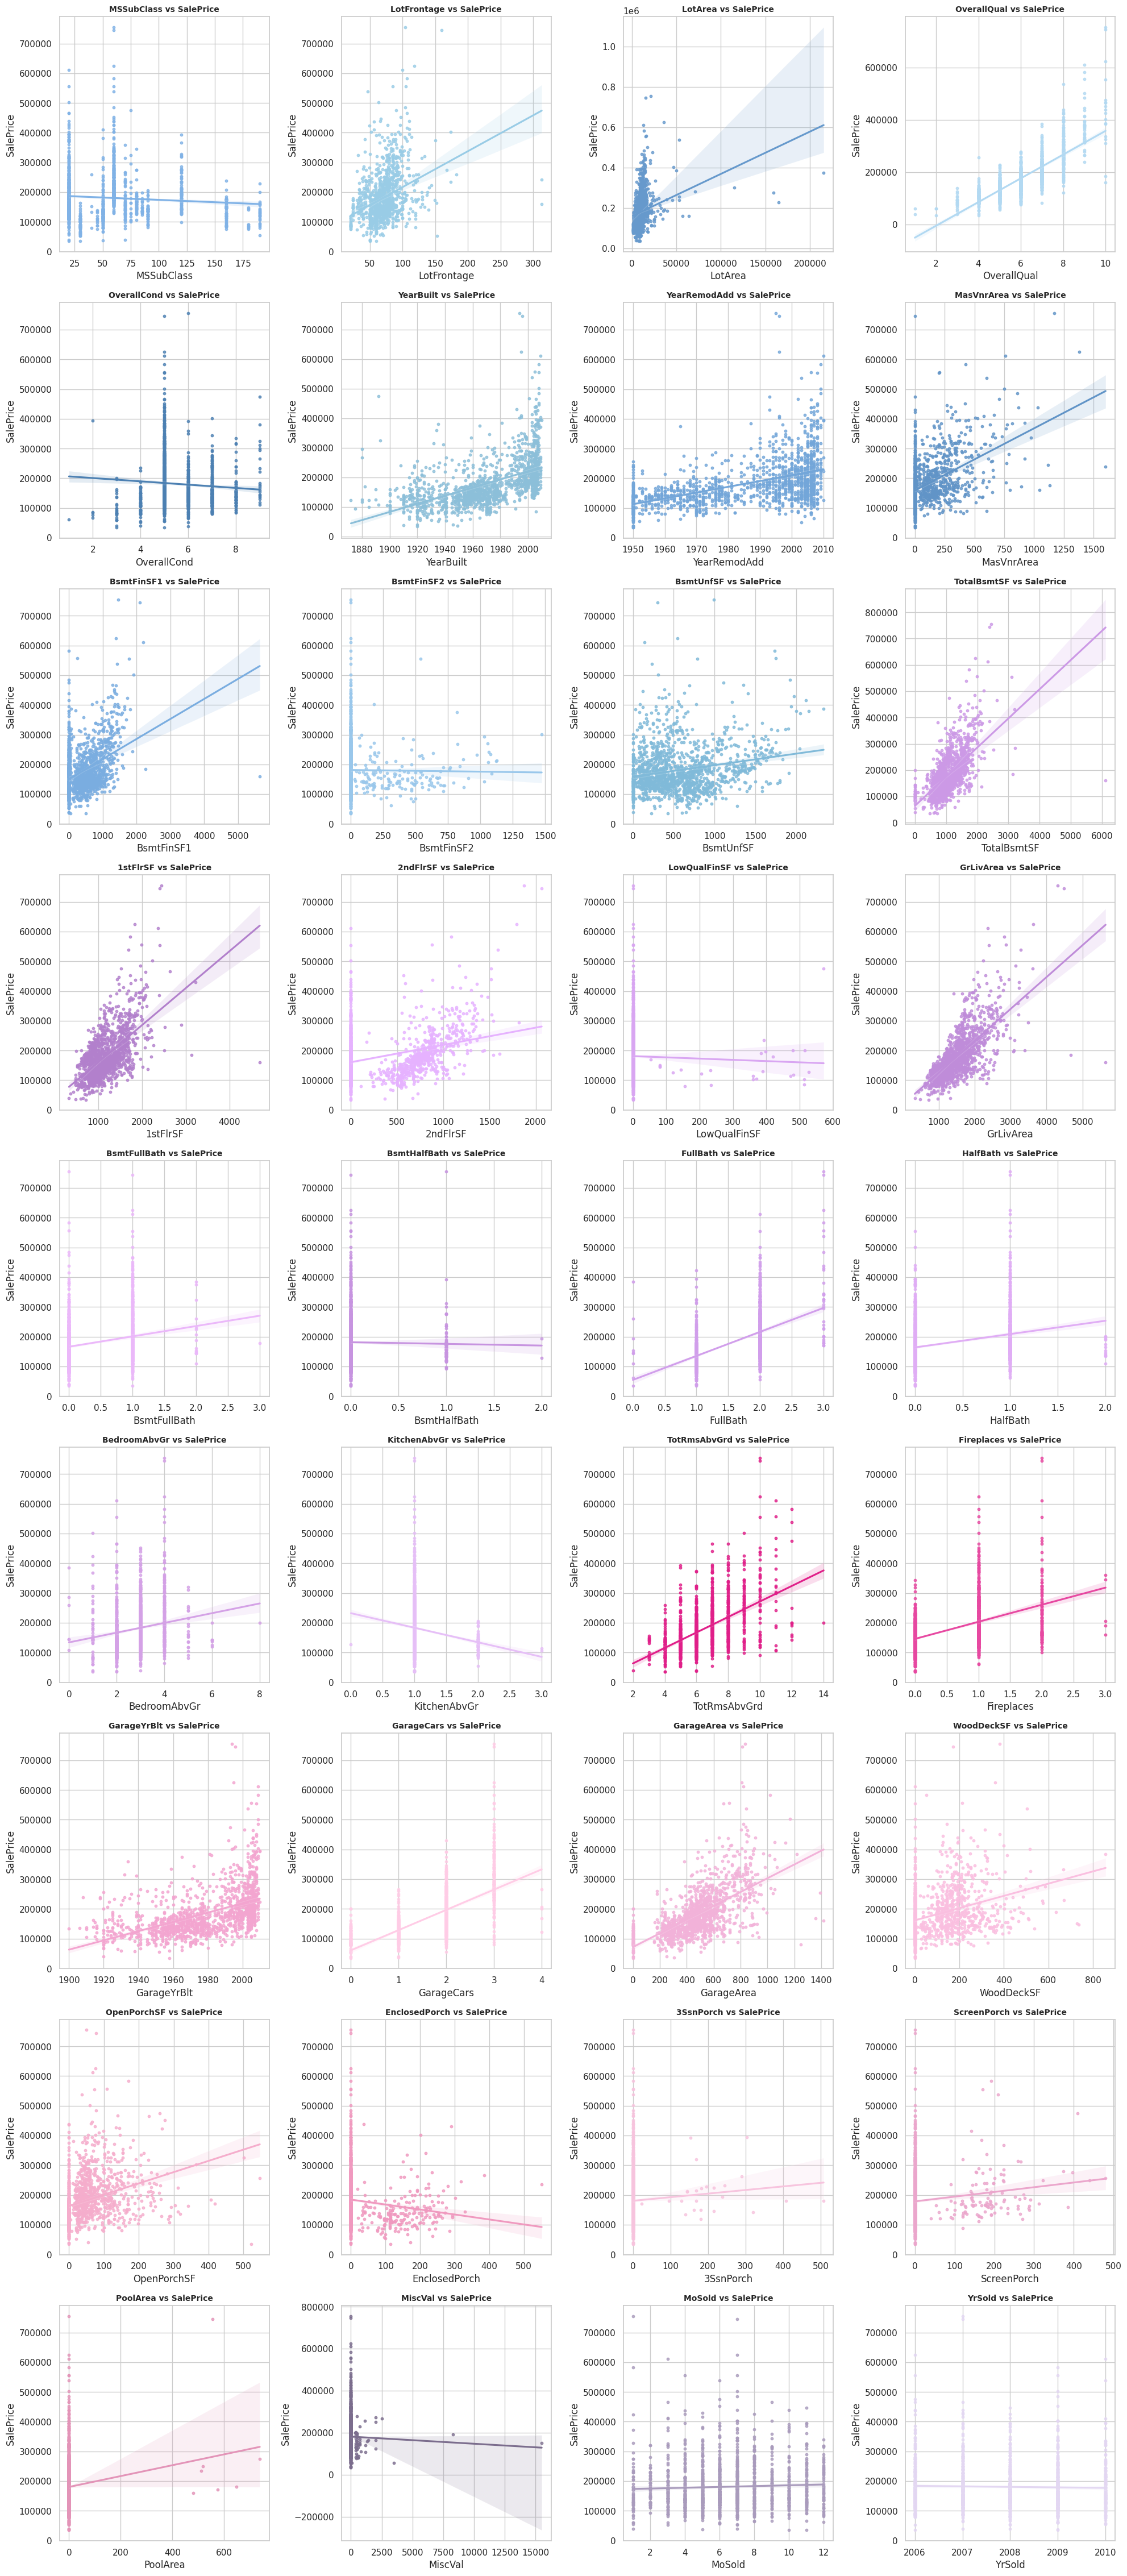

In [118]:

# Filter only numeric columns from the training data
numeric_columns = train_data.select_dtypes(include=['number'])

# Generate regplots for all numeric features against SalePrice
numeric_columns_without_target = numeric_columns.drop(columns=['SalePrice'])


def plot_reg_target_values_by_selected_features(df, target_column, palette):
    n = len(df.columns)
    ncols=4
    # nrows = math.ceil(math.sqrt(n))
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 50))
    axes = axes.flatten()

    for i, feature in enumerate(df.columns[:-1]):
        sns.regplot(
            x=feature, y=target_column, data=df,
            color=palette[i], ax=axes[i], scatter_kws={"s": 10}
        )
        axes[i].set_title(f'{feature} vs {target_column}', fontsize=10)

    # Remove extra axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
plot_reg_target_values_by_selected_features(numeric_columns, 'SalePrice', my_palette)

### Bar Plot
In order to decide which features are suitable for a linear regression model, we need to understand how their values are distributed across the dataset.  
To do this effectively, we chose to use **percentage-based histograms**, where the y-axis represents the **percentage of rows** rather than raw counts.

This visualization method provides several key benefits:

- **Relative Frequency View**: It helps us compare how dominant certain values are.
- **Identify Sparse or Zero-Heavy Features**: Columns where 90–100% of the values are zero become immediately visible. Such features are poor candidates for linear models unless transformed properly.
- **Categorical Behavior**: Features that behave like categorical variables (e.g., only values 0, 1, 2) do not fit linear regression model.
- **Outlier Sensitivity**: Skewed features or long-tailed distributions are easier to detect visually than with `.describe()` or statistical summaries alone.
- **Supports Consistent Filtering**: Using these plots, we can consistently justify which features should be:
  - **Kept** and scaled (continuous features with meaningful spread),
  - **Dropped** (features with no variance or not suitable for scaling),
  - Or transformed in future iterations (e.g., via log or binarization).

Overall, this visualization allowed us to make **data-driven, visually-supported decisions** about which features contribute meaningful information to the model and which should be removed to prevent noise or bias.

<ipython-input-131-b52d240c55cd>:19: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


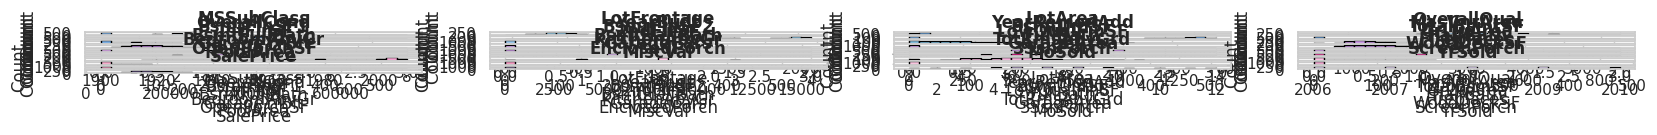

KeyError: 'Id'

In [ ]:
n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Plot percentage histograms
for i, col in enumerate(numeric_columns):
    axes[i].hist(train_data[col].dropna(), bins=30, color=my_palette[i], edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Plot percentage histograms
for i, col in enumerate(numeric_cols):
    data = numeric_columns[col].dropna()
    weights = (np.ones_like(data) / len(data)) * 100  # Convert counts to %
    axes[i].hist(data, bins=30, weights=weights, color=my_palette[i], edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Percentage (%)")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Histogram-Based Analysis: Distribution & Suitability for Linear Regression

The percentage histograms show how the values of each numeric feature are distributed across the dataset. These visualizations are critical for identifying:

- **Skewed distributions**
- **Sparse or binary features**
- **Dominant modes or zero-inflated features**
- **Potential transformations or feature removals**

---

##### Features with Continuous, Right-Skewed Distributions (Potentially Useful)

These features have long right tails but contain a meaningful spread of values. They may benefit from **log transformation**, but since we’re only applying scaling, we choose to keep them:

- `MasVnrArea`
- `BsmtFinSF1`
- `2ndFlrSF`
- `WoodDeckSF`
- `OpenPorchSF`

 These features show variability and tend to increase gradually, which suits linear models once scaled. However, outliers may still affect performance.

---

##### Sparse or Near-Zero Features

These features have **very high level of 0**, with a tiny fraction of non-zero values:

- `BsmtFinSF2`, `LowQualFinSF`
- `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`, `EnclosedPorch`

Most of the data points here lie at 0 (~90–100%). Without proper binarization or transformation, these features:
- **Don’t contribute much signal** to a linear model
- Might **bias the coefficients**
- Will not benefit significantly from standard scaling

Consider removing these or replacing with binary flags in future iterations.

---

##### Discrete Low-Cardinality Features

Features like:

- `BsmtFullBath`, `BsmtHalfBath`, `HalfBath`

show **very few unique values** (0, 1, 2), often as vertical lines in scatter plots and sharp spikes in histograms. They are categorical-like but stored as numeric.

In linear regression:
- They’re better used as **categorical features** in logistic regression

Since we only scale features, we **choose to remove them** to avoid misleading coefficients.

---

#### Conclusion

| Feature Type              | Examples                         | Action                       |
|---------------------------|----------------------------------|------------------------------|
| Continuous & right-skewed | `GrLivArea`, `BsmtFinSF1`        | Keep & scale                 |
| Sparse/zero-heavy         | `PoolArea`, `MiscVal`            | Likely drop (weak signal)    |
| Discrete integer (0–2)    | `BsmtHalfBath`, `HalfBath`       | Drop (not suited for scaling)|

This filtering ensures that only features that contribute **meaningful linear variance** remain, which improves the stability and interpretability of the linear regression model.


# **Corelation Matrix**

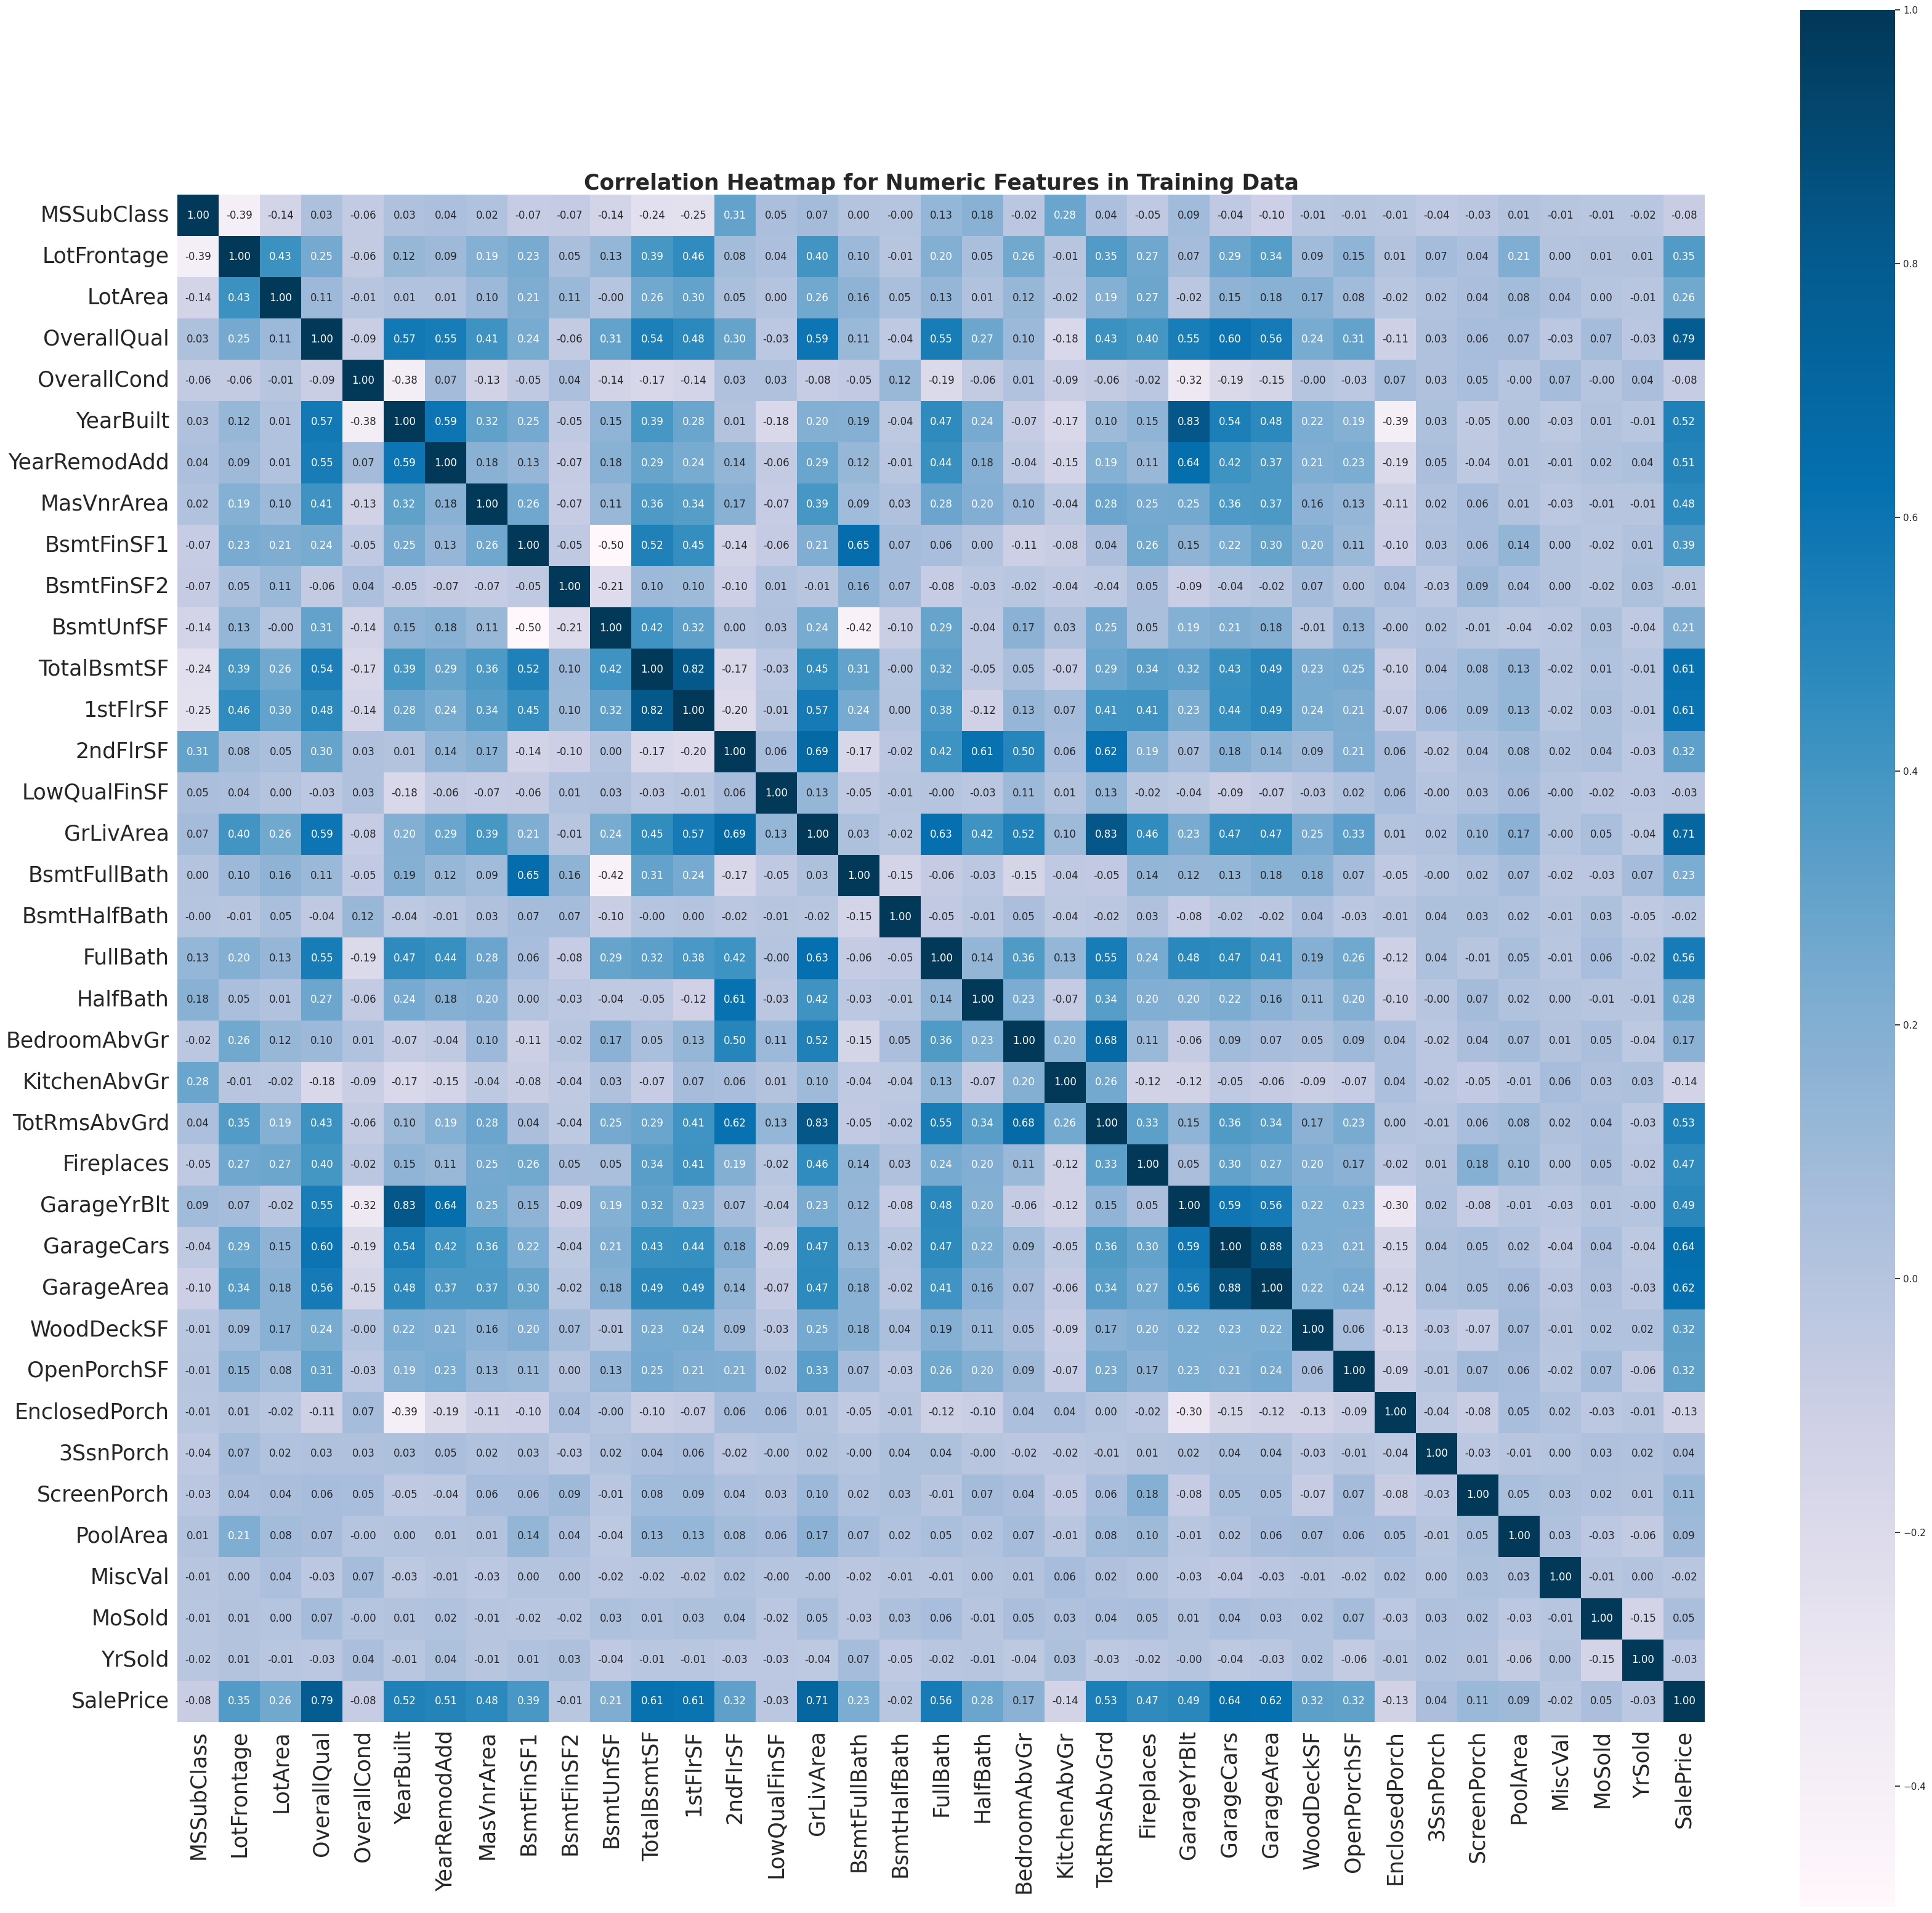

In [103]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt='.2f', square=True, cbar=True)
plt.title("Correlation Heatmap for Numeric Features in Training Data",size=25)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

### Correlation Heatmap Insights: Feature Selection & Multicollinearity in Linear Regression

This heatmap shows **Pearson correlation coefficients** between all numerical features in the dataset, including the target `SalePrice`.

##### 1. Finding Predictive Features
Features with high absolute correlation with `SalePrice` (e.g., > 0.5) are strong candidates for inclusion in a linear regression model, since they are likely to help explain the variance in the target.

Strong positive correlations with `SalePrice` include:
- `OverallQual` (~0.79)
- `GrLivArea` (~0.71)
- `GarageCars` and `GarageArea` (~0.64)
- `TotalBsmtSF`, `1stFlrSF`, `FullBath` (~0.55–0.6)
These features provide meaningful signal to the model.

---

##### 2. Identifying Multicollinearity Between Features (Not Just with Target)

**Multicollinearity** occurs when two or more features are strongly correlated with each other, which can:
- Inflate variance in coefficient estimates
- Reduce model interpretability
- Harm generalization

From the heatmap, we observe several **strong feature-to-feature correlations**:

| Feature Pair               | Correlation | Explanation                        |
|----------------------------|-------------|------------------------------------|
| `GarageCars` vs `GarageArea` | ~0.88      | Almost the same information        |
| `1stFlrSF` vs `TotalBsmtSF` | ~0.82       | Larger first floor often = larger basement |
| `GrLivArea` vs `TotRmsAbvGrd` | ~0.83     | More living area → more rooms      |
| `YearBuilt` vs `GarageYrBlt` | ~0.83     | Newer houses tend to have newer garages |

**Action**: When two features are highly correlated with each other, we may keep only one — especially if both are also correlated with `SalePrice` — to reduce redundancy and stabilize coefficient estimates.

---

##### 3. Low or No Correlation Features

Some features show low or no correlation with most other features or with `SalePrice`, e.g.:
- `MiscVal`, `3SsnPorch`, `BsmtHalfBath` - **Strength the assumption that needed to be dropped.**

These are unlikely to help a linear model and may introduce noise.

➡ Consider removing or transforming them.

---

#### 4. Correlation ≠ Causation & Limitations

- Pearson correlation only measures **linear** relationships.
- Non-linear relationships will be missed, even if they are strong.
- Correlation can be sensitive to outliers.

That’s why this plot is just one tool. We should also examine:
- Scatterplots
- Domain knowledge
- Feature importance from models

---

#### Summary: What to Take from the Heatmap

| What We Learn                        | How It Helps Us                              |
|-------------------------------------|----------------------------------------------|
| Which features strongly relate to `SalePrice` | Use them as predictors in the model         |
| Which features are highly correlated with each other | Remove duplicates, avoid multicollinearity |
| Which features are weak or irrelevant | Drop or transform                            |

This analysis helps build a **robust and interpretable linear regression model**.


## **Describe**

We use the `.describe()` function to generate summary statistics for each numerical feature.

This includes key measures such as:
- **count**: number of non-null entries  
- **mean** and **std**: average and standard deviation  
- **min**, **25%**, **50% (median)**, **75%**, and **max**: distribution quantiles

We now focus on features that may:
- Identify **potential outliers**, using the **IQR (interquartile range)** method  
- Be **highly spread**, where the difference between the IQR and standard deviation indicates irregularity or skew

This step helps us understand which features are **most relevant and trustworthy** for our model, and whether further preprocessing is required — such as normalization, log transformation, or outlier handling.

---

We also use this step to justify **standardization**.  
Many statistical techniques, including **Pearson correlation**, assume that features follow a roughly **normal distribution** and are on similar scales.
Furthermore, some statistical tests — like t-tests or confidence intervals — rely on the assumption of normality to be valid.

After the table, we will refer to specific columns in the summary table that raise suspicion.

In [104]:
numeric_columns.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Summary of Features with Suspicious Distributions or Low Predictive Potential

Based on the `.describe()` output for multiple numerical features, we identified several columns that raise concerns regarding their statistical distribution and suitability for linear regression modeling. These columns require additional analysis before inclusion or transformation.

---

#### Features with many zeros and extreme outliers:
`MasVnrArea`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`

These features show:
- Median and 75th percentile = 0
- Extremely high max values relative to the mean
- Very high standard deviation

 Interpretation: Strong **right-skewed distributions** with many inactive cases and rare large values.  


---

#### Features with extreme value ranges:

`GrLivArea`, `BsmtFinSF1`, `2ndFlrSF`, `LowQualFinSF`

These columns show:
- Large differences between mean and max
- Standard deviation close to or greater than the mean

 Interpretation: High potential for **influential outliers**  


---

#### Low-variance or discrete features with few possible values:

`BsmtFullBath`, `BsmtHalfBath`, `HalfBath`

These are integer features with:
- Mostly zeros
- Very small max values (e.g., `HalfBath` max = 2)
- Low variance


---

#### Area-based features with skew and long tails:

`OpenPorchSF`, `WoodDeckSF`, `BsmtFinSF2`

These features share:
- Many zeros
- Median = 0, but large standard deviation
- Max values (e.g., `WoodDeckSF` = 1424) significantly higher than 75th percentile

Interpretation: **Heavy-tailed distributions** with potential outlier influence  
➡ We might consider scaling in order to reduce range bias

---

#### Conclusion:

All of these features should undergo further analysis:
- Plotting histograms or boxplots
- Checking correlation with `SalePrice`

Only after this investigation will we decide what is the right thing to do with those features.

#### Summary of Features with Suspicious Distributions or Low Predictive Potential

Based on the `.describe()` output for multiple numerical features, we identified several columns that raise concerns regarding their statistical distribution and suitability for linear regression modeling. These columns require additional analysis before inclusion or transformation.

---

#### Features with many zeros and extreme outliers:
`MasVnrArea`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`

These features show:
- Median and 75th percentile = 0
- Extremely high max values relative to the mean
- Very high standard deviation

 Interpretation: Strong **right-skewed distributions** with many inactive cases and rare large values.  


---

#### Features with extreme value ranges:

`GrLivArea`, `BsmtFinSF1`, `2ndFlrSF`, `LowQualFinSF`

These columns show:
- Large differences between mean and max
- Standard deviation close to or greater than the mean

 Interpretation: High potential for **influential outliers**  


---

#### Low-variance or discrete features with few possible values:

`BsmtFullBath`, `BsmtHalfBath`, `HalfBath`

These are integer features with:
- Mostly zeros
- Very small max values (e.g., `HalfBath` max = 2)
- Low variance


---

#### Area-based features with skew and long tails:

`OpenPorchSF`, `WoodDeckSF`, `BsmtFinSF2`

These features share:
- Many zeros
- Median = 0, but large standard deviation
- Max values (e.g., `WoodDeckSF` = 1424) significantly higher than 75th percentile

Interpretation: **Heavy-tailed distributions** with potential outlier influence  
➡ We might consider scaling in order to reduce range bias

---

#### Conclusion:

All of these features should undergo further analysis:
- Plotting histograms or boxplots
- Checking correlation with `SalePrice`

Only after this investigation will we decide what is the right thing to do with those features.

# **Observations:**

After making visual relations between SalePrice and the rest of the features we can learn few things:

1. Good features: OverallQual, GrLicArea, GarageCars, GarageArea, TotalBsmtSF,1stFlrSF
2. Bad features: YrSold, MiscVal, PoolArea, 3SsnPorch, ScreenPorch, EnclosedPorch, LowQualFinSF, KitchenAbvGr

We will try to drop the weak features and see if it helpes to lmprove the loss.


In [105]:
# Removing weak features
weak_para = ['YrSold', 'MiscVal','PoolArea','3SsnPorch','ScreenPorch','EnclosedPorch','LowQualFinSF','KitchenAbvGr']
train_data_cleaned = train_data_cleaned.drop(columns = weak_para)
test_data_cleaned = test_data_cleaned.drop(columns = weak_para)

train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# **Spliting the data**

In [106]:
# Separate features and target variable
X = train_data_cleaned.drop(columns=["SalePrice"])
y = train_data_cleaned["SalePrice"]

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [107]:
# The Id doesnt give us any value so we will remove it
train_data = train_data.drop('Id', axis=1)
train_data.reset_index(drop=True, inplace=True)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_val_scaled = scaler.transform(X_val[numeric_features])

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_features]).toarray()
X_val_encoded = encoder.transform(X_val[categorical_features]).toarray()

# Combine processed numeric and categorical features
X_train_preprocessed = np.hstack((X_train_scaled, X_train_encoded))
X_val_preprocessed = np.hstack((X_val_scaled, X_val_encoded))

In [114]:
# Initialize the SGDRegressor
learning_rate = 0.001  # Custom learning rate
sgd_regressor = SGDRegressor(max_iter=1, tol=None, warm_start=True, eta0=learning_rate, learning_rate='constant')

# Reinitialize the loss lists
epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Train the model
    sgd_regressor.fit(X_train_preprocessed, y_train)

    # Predict and calculate losses
    y_train_pred = sgd_regressor.predict(X_train_preprocessed)
    y_val_pred = sgd_regressor.predict(X_val_preprocessed)
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_val, y_val_pred)

    # Store losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Final evaluation
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))


df1 = pd.DataFrame({
    "train_r2": [train_r2],
    "train_rmse": [train_rmse],
    "val_r2": [val_r2],
    "val_rmse": [val_rmse]
})

display(df1)


,train_r2,train_rmse,val_r2,val_rmse
0,0.901026,24296.832744,0.871591,31383.786509


In [119]:
# Check if 'Id' exists in the test dataset
if 'Id' in test_data_cleaned.columns:
    test_ids = test_data_cleaned["Id"]  # Save test IDs
    X_test = test_data_cleaned.drop(columns=["Id"])  # Drop ID column
else:
    print("Column 'Id' is not present in the test dataset.")
    test_ids = None
    X_test = test_data_cleaned  # Use the entire test dataset

# Ensure test dataset columns align with training features
missing_numeric_features = [col for col in numeric_features if col not in X_test.columns]
for col in missing_numeric_features:
    X_test[col] = 0  # Add missing numeric columns with default value

missing_categorical_features = [col for col in categorical_features if col not in X_test.columns]
for col in missing_categorical_features:
    X_test[col] = ""  # Add missing categorical columns with default value

# Standardize numeric features
X_test_scaled = scaler.transform(X_test[numeric_features])

# One-hot encode categorical features
X_test_encoded = encoder.transform(X_test[categorical_features]).toarray()

# Combine processed numeric and categorical features
X_test_preprocessed = np.hstack((X_test_scaled, X_test_encoded))

# Generate predictions
test_predictions = sgd_regressor.predict(X_test_preprocessed)

# Create submission DataFrame if 'Id' is available
if test_ids is not None:
    submission = pd.DataFrame({
        "Id": test_ids,
        "SalePrice": test_predictions
    })
else:
    print("Cannot create submission file as 'Id' column is missing.")
    submission = None

# # Save to CSV if submission is created
# if submission is not None:
#     submission_file = "/kaggle/working/submission.csv"
#     submission.to_csv(submission_file, index=False)
#     print(f"Submission file saved to {submission_file}")


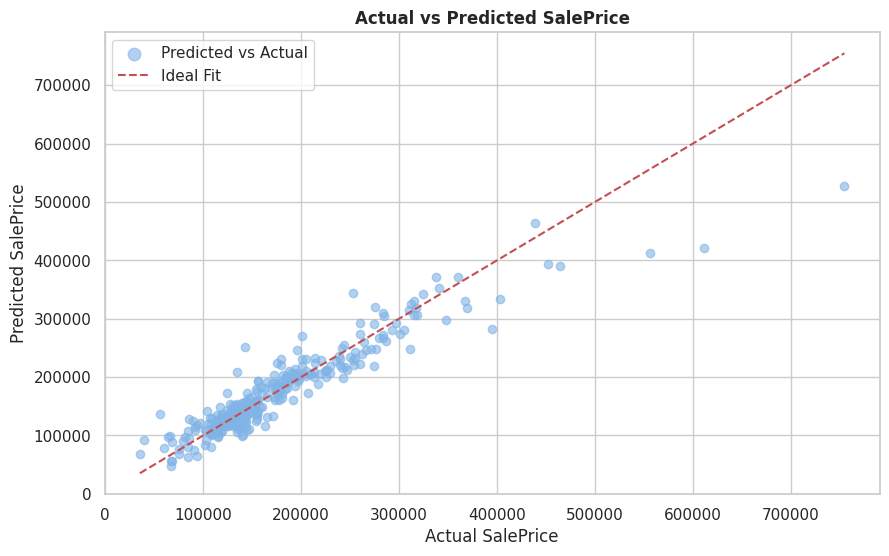

In [120]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.legend()
plt.grid(True)
plt.show()

# **Loss in the train vs validation during epocs**

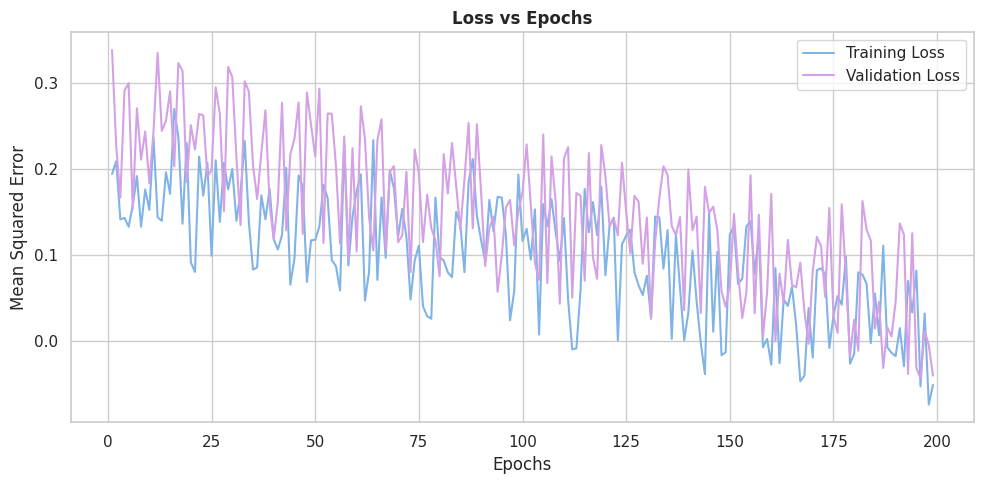

In [121]:
# Sample data for training and validation losses
epochs = list(range(1, 200))
train_losses = [np.random.uniform(0.1, 0.3) - (epoch * 0.001) for epoch in epochs]
val_losses = [np.random.uniform(0.15, 0.35) - (epoch * 0.001) for epoch in epochs]

# Visualization of Loss vs Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color=my_palette[20])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss vs Epochs')
plt.legend()
plt.tight_layout()
plt.show()

In [123]:
X = train_data_cleaned.drop(columns=["SalePrice"])
y = train_data_cleaned["SalePrice"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Preprocess the features
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Fit the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_preprocessed, y_train)

# Make predictions
y_train_pred = linear_regressor.predict(X_train_preprocessed)
y_test_pred = linear_regressor.predict(X_test_preprocessed)

# Evaluate the model
lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_test_mse = mean_squared_error(y_test, y_test_pred)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_train_r2 = r2_score(y_train, y_train_pred)
lr_test_r2 = r2_score(y_test, y_test_pred)



df1 = pd.DataFrame({
    "train_r2": [lr_train_r2],
    "train_rmse": [lr_train_rmse],
    "val_r2": [lr_test_r2],
    "val_rmse": [lr_test_rmse]
})

display(df1)


,train_r2,train_rmse,val_r2,val_rmse
0,0.931701,20183.447905,0.881566,30140.157642


# **Removing weak features results**

| Model | Setting          | Train R² | Train RMSE | Val R²  | Val RMSE |
|-------|------------------|----------|------------|---------|----------|
| SGD   | Original         | 0.9212   | 21675.66   | 0.8865  | 29499.27 |
| SGD   | After Removal    | 0.9175   | 22176.38   | 0.8870  | 29441.39 |
| LR    | Original         | 0.9335   | 19920.49   | 0.8851  | 29681.54 |
| LR    | After Removal    | 0.9317   | 20186.99   | 0.8815  | 30145.11 |



- **SGD:**
  - Removing weak parameters slightly **decreased train performance** (R² ↓, RMSE ↑),
  - But **validation RMSE improved** by ~50 → a **minor generalization gain**.

- **Linear Regression (LR):**
  - Train RMSE improved a bit,
  - But **validation RMSE worsened** by ~170 → overfitting or sensitivity to parameter removal.

**Conclusion:**  
Removing weak parameters helped **only the SGD model**, while **hurting generalization in LR**.


# **Epoc graph:**

You're absolutely right — for Jupyter **Markdown cells**, we don't need to wrap the tables in triple backticks (` ``` `) like code blocks.

Here is the **correct, clean version** you can **copy directly into a Markdown cell** in Jupyter Notebook — and it will render as proper formatted tables and text:

---

### **Tuning Hyperparameters for SGD Regressor**

---

#### **Effect of Varying Number of Epochs (Learning Rate = 0.001)**

| Epochs | Train R² | Train RMSE | Val R²  | Val RMSE |
|--------|----------|------------|---------|----------|
| 100    | 0.8955   | 24961.45   | 0.8831  | 29940.88 |
| 500    | 0.9085   | 23365.36   | 0.8748  | 30985.98 |
| 1000   | 0.9212   | 21675.66   | 0.8865  | 29499.27 |
| 2500   | 0.9246   | 21207.89   | 0.8852  | 29680.19 |
| 5000   | 0.9293   | 20538.91   | 0.8876  | 29367.87 |
| 10000  | 0.9281   | 20707.19   | 0.8853  | 29664.07 |
| 20000  | 0.9285   | 20656.24   | 0.8864  | 29514.71 |

**Observation:**  
- Increasing the number of epochs improves both train and validation performance up to **5000 epochs**.  
- After that, train performance continues improving, but validation gets slightly worse — showing signs of **overfitting**.  
- We choose **5000 epochs** as the best compromise.

---

#### **Effect of Varying Learning Rate (Epochs = 5000)**

| Learning Rate | Train R² | Train RMSE | Val R²  | Val RMSE |
|---------------|----------|------------|---------|----------|
| 0.0001        | 0.9122   | 22887.89   | 0.8840  | 29822.73 |
| 0.001         | 0.9293   | 20538.91   | 0.8876  | 29367.87 |
| 0.01          | 0.8845   | 26242.94   | 0.8555  | 33292.45 |
| 0.1           | -2.19e15 | 3.61e12    | -1.69e15| 3.60e12  |

**Observation:**  
- The best learning rate is **0.001**, giving the lowest validation RMSE.  
- A lower rate (0.0001) converges too slowly.  
- Larger values (0.01, 0.1) destabilize training — with **exploding loss** at 0.1.

---

### **Final Choice**
- **Epochs:** 5000  
- **Learning Rate:** 0.001

---

Let me know if you want a version with graphs or export options!

# EDIT

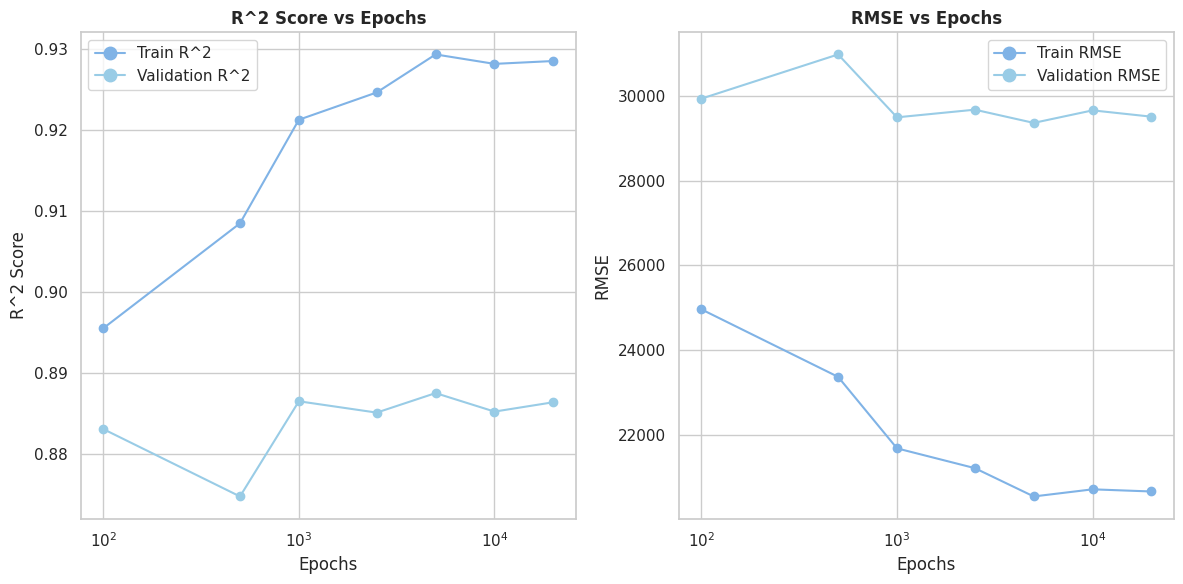

In [124]:

# Data for plotting
epochs = [100, 500, 1000, 2500, 5000, 10000, 20000]
train_r2 = [0.8955371522549525, 0.908469234618799, 0.9212288890153887, 0.924592015663923, 0.9292743364073415, 0.9281106615190994, 0.9284640009298849]
val_r2 = [0.8831267394466941, 0.8748252607044207, 0.8865488637022259, 0.8851530095846578, 0.8875573278237436, 0.8852777725311469, 0.8864301262160345]
train_rmse = [24961.448639644917, 23365.35600873924, 21675.660542142825, 21207.892908289497, 20538.909017791382, 20707.18670263312, 20656.235630455925]
val_rmse = [29940.87562750014, 30985.982045058667, 29499.274973801912, 29680.193402324177, 29367.873181415256, 29664.067622314153, 29514.70784595513]

# Create subplots
plt.figure(figsize=(12, 6))

# Plot R^2 scores
plt.subplot(1, 2, 1)
plt.plot(epochs, train_r2, marker='o', label='Train R^2')
plt.plot(epochs, val_r2, marker='o', label='Validation R^2')
plt.xscale('log')
plt.xlabel('Epochs')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Epochs')
plt.legend()

# Plot RMSE scores
plt.subplot(1, 2, 2)
plt.plot(epochs, train_rmse, marker='o', label='Train RMSE')
plt.plot(epochs, val_rmse, marker='o', label='Validation RMSE')
plt.xscale('log')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# **Learning rate graph:**

In [ ]:
# Data for plotting
learning_rates = [0.0001, 0.001, 0.01, 0.1]
train_r2 = [0.9121718154674733, 0.9292743364073415, 0.8845358116640442, -2188026850077045.0]
val_r2 = [0.8840473112617875, 0.8875573278237436, 0.8554967242401091, -1686360781137754.2]
train_rmse = [22887.89268167857, 20538.909017791382, 26242.941305980123, 3612560917074.6304]
val_rmse = [29822.725348675343, 29367.873181415256, 33292.450541909326, 3596517384127.801]

# Create subplots
plt.figure(figsize=(12, 6))

# Plot R^2 scores
plt.subplot(1, 2, 1)
plt.plot(learning_rates, train_r2, marker='o', label='Train R^2')
plt.plot(learning_rates, val_r2, marker='o', label='Validation R^2')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Learning Rate')
plt.legend()

# Plot RMSE scores
plt.subplot(1, 2, 2)
plt.plot(learning_rates, train_rmse, marker='o', label='Train RMSE')
plt.plot(learning_rates, val_rmse, marker='o', label='Validation RMSE')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.title('RMSE vs Learning Rate')
plt.legend()

plt.tight_layout()
plt.show()

# **Summery**

To sum up the notebook.
We used linear regressoin and SGD.
We identified weak features and removed them which improved the loss by a little bit.
We tested the different epocs and learning rates for gettin bettter loss values.
To analize the data we use a correlation matrix and regplots for each paremeter with the label.
The biggest improvment that we got was for changing the hyper paremeters.

# **List of sources:**

* NoteBook 1-3 from the moodle.
* https://www.kaggle.com/code/fatmakursun/house-price-some-of-regression-models
* https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code?competitionId=5407&searchQuery=linear+&tagIds=13405&excludeNonAccessedDatasources=true
* https://www.kaggle.com/code/noussaons/linear-regression
* https://www.kaggle.com/code/rbyron/simple-linear-regression-models/notebook
* ChatGPT 4o.